In [1]:
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
b = tf.Variable(tf.zeros((100,)))
W = tf.Variable(tf.random_uniform((784, 100),
                -1, 1))

x = tf.placeholder(tf.float32, (None, 784), name="x")
h_i = tf.nn.relu(tf.matmul(x, W) + b)

---------------------------------

## Linear regression example

In [3]:
tf.ops.reset_default_graph()

Our target data is generated by $y = 2x + \epsilon$, where $\epsilon \sim \mathcal N(0, \sigma^2)$.

In [4]:
x_batch = np.linspace(-1, 1, 101)
y_batch = x_batch * 2 + np.random.randn(*x_batch.shape) * 0.3

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


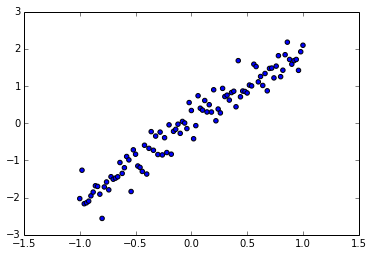

In [5]:
plt.scatter(x_batch, y_batch)

Add placeholder nodes to our graph for input values $x$ and targets $y$. The only required argument to `tf.placeholder` is the datatype specification.

The second argument `shape=(None,)` indicates that these variables take on a 1-dimensional value of a *dynamic* size. We can use the `None` value in this case to allow for arbitrary batch sizes.

In [6]:
x = tf.placeholder(tf.float32, shape=(None,), name="x")
y = tf.placeholder(tf.float32, shape=(None,), name="y")

Build a weight variable $w$ and provide an initial value. This initial value can be a tensor or some value convertible to a tensor (e.g. a numpy `ndarray`).

In [7]:
w = tf.Variable(np.random.normal(), name="W")

Use the weight $w$ to predict a value $\hat y$ given a symbolic value $x$.

In [8]:
y_pred = tf.mul(w, x)

In [9]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

We can plot the predictions of the model before training:

In [10]:
y_pred_batch = sess.run(y_pred, {x: x_batch})

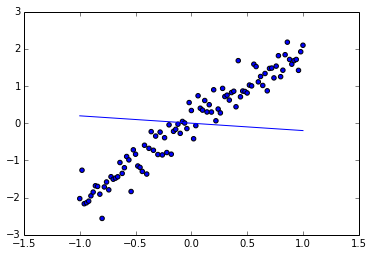

In [11]:
plt.figure(1)
plt.scatter(x_batch, y_batch)
plt.plot(x_batch, y_pred_batch)

Now let's define a cost function (MSE) and begin training.

In [12]:
cost = tf.reduce_mean(tf.square(y_pred - y))

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [14]:
train_op = optimizer.minimize(cost)

In [15]:
for _ in range(30):
    cost_t, _ = sess.run([cost, train_op], {x: x_batch, y: y_batch})
    print cost_t.mean()

1.79242
1.5687
1.37438
1.20558
1.05896
0.931596
0.820969
0.724876
0.641406
0.568903
0.505925
0.451221
0.403703
0.362428
0.326576
0.295434
0.268383
0.244886
0.224476
0.206747
0.191348
0.177971
0.166352
0.15626
0.147493
0.139878
0.133263
0.127518
0.122527
0.118192


In [16]:
y_pred_batch = sess.run(y_pred, {x: x_batch})

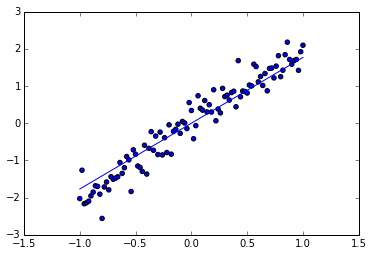

In [17]:
plt.figure(1)
plt.scatter(x_batch, y_batch)
plt.plot(x_batch, y_pred_batch)